In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

#Датасет с нормальными комментариями

Скачиваем датасет с номальными комментариями.


In [ ]:
with open('drive/MyDrive/Diplom/my_clean_data_normies.csv') as f:
    my_data_normies = pd.read_csv(f, sep=',')

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#my_data_normies

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Проверим датасет с нормальными комментариями, так как многие имена авторов содержат 'bot', что вызывает подозрения.

In [ ]:
import re

word = '[bB][oO][tT]'

def bot(author_name):
    #print(author_name)
    if pd.isna(author_name):
      #print(author_name)
      return 0
    if re.search(word, author_name) != None:
      return 1
    return 0


my_data_normies['bot_author'] = my_data_normies['author'].apply(bot)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
sum(my_data_normies['bot_author'])

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


120637

Получаем 120 637 строк, в которых имя автора похоже имя бота.

In [ ]:
my_data_normies = my_data_normies.drop(my_data_normies[my_data_normies.bot_author == 1].index)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Попробуем другой датасет для нормальных комментариев.

In [ ]:
normal_comments=pd.read_csv("drive/MyDrive/Diplom/csv-zusammenfuehren.de_3mjg6fs7.csv", 
                            usecols = ["link_id", "author", "score", "body", "ups"],
                            dtype={
                                "link_id": str,
                                #"gilded": bool,  = 0 everywhere
                                "author": str,
                                #"created_utc": int,
                                #"score": np.float64,
                                "body": str,
                                #"controversiality": np.float64, = 0 everywhere
                                #"ups": np.float64
                                }, 
                                 #error_bad_lines=False,
                                on_bad_lines='warn')

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
normal_comments = normal_comments.convert_dtypes()
normal_comments.dtypes

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


body       string
author     string
link_id    string
score      string
ups        string
dtype: object

In [ ]:
normal_comments

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,body,author,link_id,score,ups
0,"I guess there was some awkwardness, but it was...",elevenghosts,t3_2urgi1,1,1
1,"Food schmooze isn't bad, I've gotten a few int...",BeerBaldBeard,t3_2wj4w8,1,1
2,Is there a fatigue animation before sleep that...,tmrxwoot,t3_2vvy1m,1,1
3,"I recently saw some Shohei Inamura films, spec...",Zassolluto711,t3_2x9q0x,2,2
4,How long did that take?,Ditto_B,t3_2w566b,2,2
...,...,...,...,...,...
45144,I remember the 2007 clippers. Which is the sa...,kcheng686,t3_5on47d,1,<NA>
45145,On second thought you might actually be autistic,DisconnectedCorn,t3_5q9ppf,1,<NA>
45146,"Hello darkness, my old friend, I've come to ta...",najing_ftw,t3_5pqb17,3,<NA>
45147,You can't use the enter key when you're doing ...,Fourteen_of_Twelve,t3_5oh8zt,5,<NA>


Посчитаем количество авторов содержащих паттерн "bot".

In [ ]:
normal_comments['bot_author'] = normal_comments['author'].apply(bot)
sum(normal_comments['bot_author'])

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


303

Таких авторов всего 303, значит этот датасет нам вероятно подходит больше. Удалим комментарии этих авторов.

In [ ]:
normal_comments = normal_comments.drop(normal_comments[normal_comments.bot_author == 1].index)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Добавим признаки is_bot is_troll is_normal.

In [ ]:
normal_comments.drop(['bot_author'], axis=1, inplace = True)
normal_comments['is_bot'] = False
normal_comments['is_troll'] = False
normal_comments['is_normal'] = True

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Проверим все признаки на соответствие типу и удалим или заменим пустые значения.

In [ ]:
print('number of nuns in score column:' ,normal_comments.score.isna().sum())
print('number of nuns in link_id column:' ,normal_comments.link_id.isna().sum())

print('number of nuns in author column:' ,normal_comments.author.isna().sum())
print('number of nuns in body column:' ,normal_comments.body.isna().sum())

print('number of nuns in ups column:' ,normal_comments.ups.isna().sum())

number of nuns in score column: 13
number of nuns in link_id column: 13
number of nuns in author column: 16
number of nuns in body column: 0
number of nuns in ups column: 13499


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Зополняем 'score','ups' нулями, а 'link_id','author' строкой 'unknown'.

In [ ]:
normal_comments[['score','ups']] = normal_comments[['score','ups']].fillna(value='0')
normal_comments[['link_id','author']] = normal_comments[['link_id','author']].fillna(value='unknown')

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def check_num(x):
  result = re.match("[-+]?\d+$", x)
  
  if result is not None:
    return 0
  else:
    return 1

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:2: DeprecationWarning: invalid escape sequence \d
<>:2: DeprecationWarning: invalid escape sequence \d
<ipython-input-108-698dc9875eca>:2: DeprecationWarning: invalid escape sequence \d
  result = re.match("[-+]?\d+$", x)


In [ ]:
normal_comments['is_score_ok'] = normal_comments.score.apply(lambda x: check_num(x))
print('number of wrong-type values in score column', normal_comments['is_score_ok'].sum())

number of wrong-type values in score column 6


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
normal_comments[normal_comments.is_score_ok == 1]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,body,author,link_id,score,ups,is_bot,is_troll,is_normal,is_score_ok
4579,However,false,1425957719,t3_2ygb9z,cp9w6yh,False,False,True,1
9682,"&gt; Sometimes, we need a moment to raise awar...",unknown,t5_2zc5x,t1_cwbjml0,Fireteams,False,False,True,1
11213,And I'm really,those negative people who contribute little o...,false,p_U_c_K_IV,t1_ctitrc4,False,False,True,1
33340,I thought Titan of Braavos was used by his fat...,unknown,t5_2r2o9,t1_d5apvwb,asoiaf,False,False,True,1
38618,You mean to tell me that not all white people ...,unknown,1489440218,t3_5z537w,devy9pm,False,False,True,1
40409,"Who let Chip be on Reddit again? [removed],,,,...",unknown,t5_2qh0u,t3_66v6i6,pics,False,False,True,1


Удалим строки, приведенные выше (в них перепутаны значения в столбцах).

In [ ]:
normal_comments = normal_comments.drop(normal_comments[normal_comments.is_score_ok == 1].index)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
normal_comments['is_ups_ok'] = normal_comments.score.apply(lambda x: check_num(x))
print('number of wrong values in ups column', normal_comments['is_ups_ok'].sum())

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


number of wrong values in ups column 0


In [ ]:
normal_comments.drop(['is_ups_ok'], axis=1, inplace = True)
normal_comments.drop(['is_score_ok'], axis=1, inplace = True)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
normal_comments.score = normal_comments.score.astype('int64')
normal_comments.ups = normal_comments.ups.astype('int64')

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

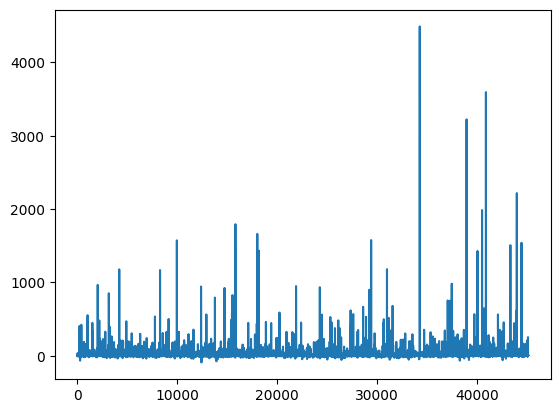

In [ ]:
normal_comments['score'].plot(kind='line')

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

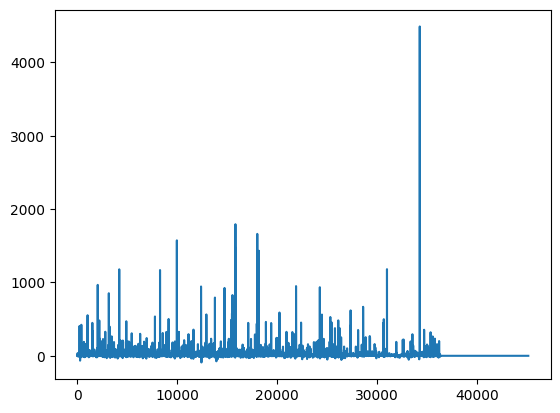

In [ ]:
normal_comments['ups'].plot(kind='line')

In [ ]:
normal_comments[normal_comments.score > 4000]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,body,author,link_id,score,ups,is_bot,is_troll,is_normal
34280,I know this is the opposite of what you asked ...,dewayneestes,t3_4r4a7r,4490,4490,False,False,True


#Датасет с ботами и троллями

Теперь откроем датасет с ботами и тролями.

In [ ]:
with open('drive/MyDrive/Diplom/training-dump.csv') as f:
    my_data = pd.read_csv(f, sep=',',
                          usecols = ["link_id",  "author", "score", "body", "ups","is_bot","is_troll"],
                          dtype={"link_id": str,
                                 "author": str,
                                 "body": str,
                                 "is_bot": bool,
                                 "is_troll": bool})

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
my_data['is_normal'] = False

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
my_data

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,link_id,author,score,body,ups,is_bot,is_troll,is_normal
0,t3_2l5szg,ADHDbot,1,"As per the rules in the side bar, yes or no qu...",1,True,False,False
1,t3_2l61gs,ADHDbot,1,Meme and image posts are not allowed on this s...,1,True,False,False
2,t3_2l7ma8,ADHDbot,1,"As per the rules in the side bar, yes or no qu...",1,True,False,False
3,t3_2l7t5h,ADHDbot,1,"As per the rules in the side bar, yes or no qu...",1,True,False,False
4,t3_2l900k,ADHDbot,1,We cannot and will not diagnose anyone. You n...,1,True,False,False
...,...,...,...,...,...,...,...,...
267031,t3_96p3s7,haiku_robot,7,ಠ\_ಠ,7,True,False,False
267032,t3_1w5fy8,tipmoonbot2,2,+/u/tipmoonbot 48 moon TO THE MOON!,2,True,False,False
267033,t3_1w5fy8,tipmoonbot2,1,+/u/tipmoonbot 26 moon TO THE MOON!,1,True,False,False
267034,t3_1w6etv,tipmoonbot2,2,blah blah,2,True,False,False


In [ ]:
my_data = my_data.convert_dtypes()
my_data.dtypes

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


link_id       string
author        string
score          Int64
body          string
ups            Int64
is_bot       boolean
is_troll     boolean
is_normal    boolean
dtype: object

In [ ]:
print('number of nuns in score column:' ,my_data.score.isna().sum())
print('number of nuns in link_id column:' ,my_data.link_id.isna().sum())

print('number of nuns in author column:' ,my_data.author.isna().sum())
print('number of nuns in body column:' ,my_data.body.isna().sum())


print('number of nuns in ups column:' ,my_data.ups.isna().sum())

print('number of nuns in is_bot column:' ,my_data.is_bot.isna().sum())
print('number of nuns in is_troll column:' ,my_data.is_troll.isna().sum())

number of nuns in score column: 0
number of nuns in link_id column: 0
number of nuns in author column: 0
number of nuns in body column: 1
number of nuns in ups column: 0
number of nuns in is_bot column: 0
number of nuns in is_troll column: 0


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
my_data.dropna(subset = ['body'], inplace = True)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
my_data.is_bot = my_data.is_bot.astype(bool)
my_data.is_troll = my_data.is_troll.astype(bool)
my_data.is_normal = my_data.is_normal.astype(bool)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
my_data.dtypes

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


link_id      string
author       string
score         Int64
body         string
ups           Int64
is_bot         bool
is_troll       bool
is_normal      bool
dtype: object

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

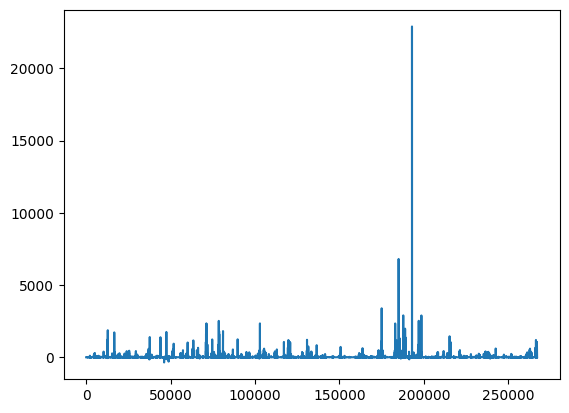

In [ ]:
my_data['score'].plot(kind='line')

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

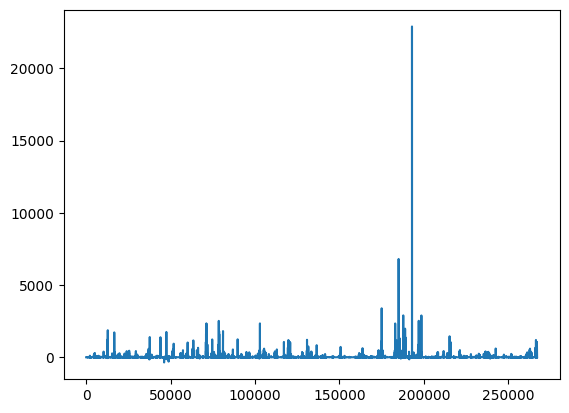

In [ ]:
my_data['ups'].plot(kind='line')

Посмотрим на это крайнее значение.

In [ ]:
my_data[my_data.score > 10000]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,link_id,author,score,body,ups,is_bot,is_troll,is_normal
192972,t3_7ja1xx,BerskyN,22893,You may never know if you've gone insane.,22893,False,True,False
192973,t3_7ja1xx,BerskyN,11927,If you become an astronaut and are in the ISS ...,11927,False,True,False
192974,t3_7ja1xx,BerskyN,14938,There are a huge amount of illnesses that aren...,14938,False,True,False
192975,t3_7ja1xx,BerskyN,22030,The first firefighter killed responding to the...,22030,False,True,False
192976,t3_7ja1xx,BerskyN,14104,Every picture you pose for could be the one us...,14104,False,True,False


#Объединенный датасет

Соединяем два датасета

In [ ]:
#full_data = my_data.append(normal_comments)
frames = [my_data, normal_comments]

full_data = pd.concat(frames, ignore_index=True)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
full_data.dtypes

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


link_id      string
author       string
score         Int64
body         string
ups           Int64
is_bot         bool
is_troll       bool
is_normal      bool
dtype: object

Удалим повторяющиеся строки и строки с пустым полем комментариев.

In [ ]:
full_data.drop_duplicates(inplace=True)
full_data.dropna(subset = ['body'], inplace=True)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
full_data

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,link_id,author,score,body,ups,is_bot,is_troll,is_normal
0,t3_2l5szg,ADHDbot,1,"As per the rules in the side bar, yes or no qu...",1,True,False,False
1,t3_2l61gs,ADHDbot,1,Meme and image posts are not allowed on this s...,1,True,False,False
2,t3_2l7ma8,ADHDbot,1,"As per the rules in the side bar, yes or no qu...",1,True,False,False
3,t3_2l7t5h,ADHDbot,1,"As per the rules in the side bar, yes or no qu...",1,True,False,False
4,t3_2l900k,ADHDbot,1,We cannot and will not diagnose anyone. You n...,1,True,False,False
...,...,...,...,...,...,...,...,...
311870,t3_5on47d,kcheng686,1,I remember the 2007 clippers. Which is the sa...,0,False,False,True
311871,t3_5q9ppf,DisconnectedCorn,1,On second thought you might actually be autistic,0,False,False,True
311872,t3_5pqb17,najing_ftw,3,"Hello darkness, my old friend, I've come to ta...",0,False,False,True
311873,t3_5oh8zt,Fourteen_of_Twelve,5,You can't use the enter key when you're doing ...,0,False,False,True


In [ ]:
# Count num of bots and trolls
bots = full_data['is_bot']
trolls = full_data['is_troll']
normals = full_data['is_normal']

print("Number of bot comments: ", bots.sum())
print("Number of troll comments:", trolls.sum())
print("Number of normal comments:", normals.sum())

bot_authors = full_data[full_data['is_bot'] == True][['author']]
troll_authors = full_data[full_data['is_troll'] == True][['author']]
normal_authors = full_data[full_data['is_normal'] == True][['author']]

print("Number of bot authors: ", len(np.unique(bot_authors)))
print("Number of troll authors:", len(np.unique(troll_authors)))
print("Number of normal authors:", len(np.unique(normal_authors)))

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Number of bot comments:  177238
Number of troll comments: 6552
Number of normal comments: 44835
Number of bot authors:  343
Number of troll authors: 153
Number of normal authors: 39667


Выделим целевую переменную в отдельный столбец.

In [ ]:
full_data['is_troll'] = np.where(full_data['is_troll'] == True, 1,0)
full_data['is_normal'] = np.where(full_data['is_normal'] == True, 2,0)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
full_data['Y'] = full_data['is_troll']+full_data['is_normal']
full_data.drop(columns = ['is_troll', 'is_normal', 'is_bot'], inplace = True)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
full_data['Y'].value_counts()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0    177238
2     44835
1      6552
Name: Y, dtype: int64

Теперь 0 - бот, 1 - тролль, 2 - нормальный комментарий.

# Балансировка классов

In [ ]:
dataset = pd.concat([full_data[full_data.Y==2].sample(n=80000, replace=True, random_state=1), full_data[full_data.Y==1].sample(n=20000, replace=True, random_state=1), full_data[full_data.Y==0].sample(n=80000)])
dataset

,link_id,author,score,body,ups,Y
300041,t3_5kgo9t,woodtick57,2,those states wouldn't have mattered even if he...,0,2
279207,t3_3n3uy6,jessmyser,1,"You are a gem, I shall be locating this post h...",1,2
272227,t3_36c1zu,nileppez_del,1,Not very happy about it. Leave Sylvannas and T...,1,2
299549,t3_5fti0p,DoubleM101,1,In Portugal too.,0,2
310763,t3_5r60jm,[deleted],2,I've had the radio at the lowest possible soun...,0,2
...,...,...,...,...,...,...
115834,t3_5xi5pj,gabenizer-bot,1,[Source](https://www.reddit.com/r/gentlemanbon...,1,0
108884,t3_61cp1p,dogetipbot,1,__^[wow ^so ^verify]__: ^/u/tomcarbon ^-&gt; ^...,1,0
112102,t3_1t7tq8,fact_check_bot,1,The idea that lightning never strikes the same...,1,0
139159,t3_21axp0,nba_gif_bot,2,[Mobile friendly version](http://fitbamob.com/...,2,0


In [ ]:
dataset['Y'].value_counts()

2    80000
0    80000
1    20000
Name: Y, dtype: int64

#Анализ тональности

In [ ]:
!pip install nltk

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from textblob import TextBlob
import nltk

nltk.download('all')

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package av

True

Анализ тональности сообщений будем проводить с пмощью  TextBlob. Метод .sentiment.polarity принимает на вход комментарий и возвращает значение от -1 до 1, где -1 - отрицательная полярность, а 1 - положительная. Также метод .sentiment.subjectivity определит субъективность / объективность, возвращая значение в пределах от 0 до 1, где 0 - очень объективный комментарий и 1 очень субъективный комментарий.

In [ ]:
full_data.dtypes

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


link_id    string
author     string
score       Int64
body       string
ups         Int64
Y           int64
dtype: object

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

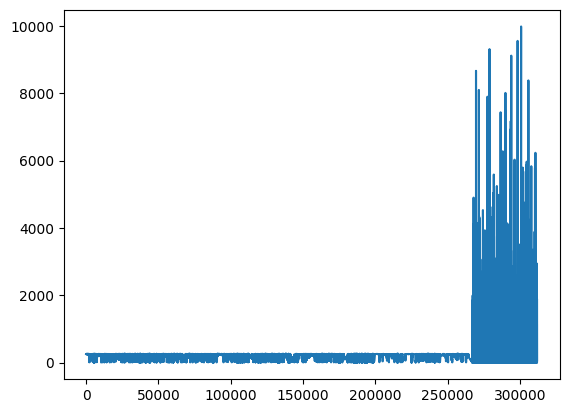

In [ ]:
#my_data['ups'].plot(kind='line')
full_data['body'].apply(lambda x: len(x)).plot(kind='line')

In [ ]:
#def polar(text):

full_data['polarity'] = full_data['body'].apply(lambda x: TextBlob(x).sentiment.polarity)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
full_data['subjectivity'] = full_data['body'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Добавим еще несколько признаков на основе текста.

In [ ]:
full_data['body_length'] = full_data['body'].apply(lambda x: len(x))
#длина комментария

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
full_data.to_csv('drive/MyDrive/Diplom/full_data.csv', sep=',', index=False)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Random Frorest

(пока на несбалансированном датасете)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [ ]:
df = full_data.drop(columns = ['link_id','author','body'])

X_train, X_test, y_train, y_test = train_test_split(
            df.drop(['Y'], axis=1), df['Y'].values,
            test_size=0.3, random_state=16)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

def metrics(y_test, y_pred):
  
  conf = confusion_matrix(y_test, y_pred)
  print(conf)
  print(classification_report(y_test, y_pred,zero_division=0))


In [ ]:
clf = DecisionTreeClassifier(max_depth=3, 
                             #class_weight='balanced',
                             #class_weight={'normal':1, 'bot':2.5, 'troll':5}, 
                             min_samples_leaf=100)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

metrics(y_test, y_pred)

feature_imp = pd.Series(
        clf.feature_importances_,
        index=df.columns.drop('Y')).sort_values(ascending=False)
print(feature_imp)

[[53162     0     0]
 [ 2050     0     0]
 [ 8659     0  4717]]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91     53162
           1       0.00      0.00      0.00      2050
           2       1.00      0.35      0.52     13376

    accuracy                           0.84     68588
   macro avg       0.61      0.45      0.48     68588
weighted avg       0.84      0.84      0.81     68588

body_length     0.815751
score           0.093141
ups             0.066730
subjectivity    0.024378
polarity        0.000000
dtype: float64


Посмотрим, что будет, если убрать Body_length.

In [ ]:
df.drop(columns = ['body_length'], inplace = True)

X_train, X_test, y_train, y_test = train_test_split(
            df.drop(['Y'], axis=1), df['Y'].values,
            test_size=0.3, random_state=16)

In [ ]:
clf = DecisionTreeClassifier(max_depth=3, 
                             #class_weight='balanced',
                             #class_weight={'normal':1, 'bot':2.5, 'troll':5}, 
                             min_samples_leaf=100)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

metrics(y_test, y_pred)

feature_imp = pd.Series(
        clf.feature_importances_,
        index=df.columns.drop('Y')).sort_values(ascending=False)
print(feature_imp)

[[53162     0     0]
 [ 2050     0     0]
 [ 9599     0  3777]]
              precision    recall  f1-score   support

           0       0.82      1.00      0.90     53162
           1       0.00      0.00      0.00      2050
           2       1.00      0.28      0.44     13376

    accuracy                           0.83     68588
   macro avg       0.61      0.43      0.45     68588
weighted avg       0.83      0.83      0.78     68588

score           0.532913
ups             0.430819
subjectivity    0.019264
polarity        0.017005
dtype: float64


Все не так уж плохо!

# Логистическая регрессия

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression(max_iter=500)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

metrics(y_test, y_pred)

[[53162     0     0]
 [ 2050     0     0]
 [ 9599     0  3777]]
              precision    recall  f1-score   support

           0       0.82      1.00      0.90     53162
           1       0.00      0.00      0.00      2050
           2       1.00      0.28      0.44     13376

    accuracy                           0.83     68588
   macro avg       0.61      0.43      0.45     68588
weighted avg       0.83      0.83      0.78     68588



In [ ]:
y_proba = model.predict_proba(X_test)[:,1]

from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
def plot_sklearn_roc_curve(y_real, y_pred):
    fpr, tpr, _ = roc_curve(y_real, y_pred)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    roc_display.figure_.set_size_inches(5,5)
    plt.plot([0, 1], [0, 1], color = 'g')
# Plots the ROC curve using the sklearn methods - Good plot
plot_sklearn_roc_curve(y_test, y_proba[:, 1])
# Plots the ROC curve using the sklearn methods - Bad plot
plot_sklearn_roc_curve(y_test, y_pred)


# LDA

Tokenize Sentences and Clean

In [2]:
import sys
#!{sys.executable} -m spacy download en
from pprint import pprint

In [3]:
import gensim, spacy, logging, warnings
import gensim.corpora as corpora

from gensim.models import CoherenceModel
from gensim.utils import simple_preprocess

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [4]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])

In [6]:
import pickle

In [ ]:
def sent_to_words(sentences):
    for sent in sentences:
        sent = re.sub(r'\S*@\S*\s?', '', sent)  # remove emails
        sent = re.sub(r'\s+', ' ', sent)  # remove newline chars
        sent = re.sub(r"\'", "", sent)  # remove single quotes
        sent = re.sub(r'http\S+', '', sent)  # remove links
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        yield(sent)  

#data = full_data.body.values
data_words = list(sent_to_words(full_data.body.values))
len(data_words)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


228628

4. Build the Bigram, Trigram Models and Lemmatize

In [ ]:
# Build the bigram and trigram models
#gensim.models.Phrases : Automatically detect common phrases – aka multi-word expressions, word n-gram collocations – from a stream of sentences.

bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# !python3 -m spacy download en  # run in terminal once
def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    #Convert a document into a list of tokens.
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    #nlp = spacy.load('en', disable=['parser', 'ner'])
    nlp = spacy.load("en_core_web_sm")
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    # remove stopwords once more after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
    return texts_out


data_ready = process_words(data_words)  # processed Text Data!

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
with open("drive/MyDrive/Diplom/data_ready", "wb") as fp:
  pickle.dump(data_ready, fp)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
with open("drive/MyDrive/Diplom/data_ready", "rb") as fp:
  data_ready = pickle.load(fp)

In [ ]:
len(data_ready)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


228628

5. Build the Topic Model


In [11]:
# Create Dictionary
id2word = corpora.Dictionary(data_ready)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           #per_word_topics=True
                                            )

pprint(lda_model.print_topics())

[(0,
  '0.020*"time" + 0.016*"really" + 0.013*"much" + 0.012*"people" + '
  '0.010*"give" + 0.009*"day" + 0.008*"never" + 0.008*"actually" + '
  '0.007*"well" + 0.006*"back"'),
 (1,
  '0.092*"game" + 0.070*"still" + 0.068*"play" + 0.053*"find" + 0.036*"show" + '
  '0.032*"version" + 0.031*"enough" + 0.030*"player" + 0.027*"bit" + '
  '0.023*"agree"'),
 (2,
  '0.173*"man" + 0.132*"reason" + 0.108*"title" + 0.100*"original" + '
  '0.061*"subreddit" + 0.017*"copy" + 0.012*"grind" + 0.011*"deny" + '
  '0.011*"resubmit" + 0.009*"iron"'),
 (3,
  '0.040*"bad" + 0.038*"start" + 0.035*"guy" + 0.031*"happen" + 0.031*"end" + '
  '0.029*"team" + 0.023*"life" + 0.019*"action" + 0.016*"card" + '
  '0.014*"season"'),
 (4,
  '0.067*"work" + 0.042*"sure" + 0.038*"pretty" + 0.035*"great" + 0.034*"long" '
  '+ 0.026*"thing" + 0.018*"hour" + 0.018*"video" + 0.018*"lol" + '
  '0.015*"definitely"'),
 (5,
  '0.123*"delete" + 0.091*"remove" + 0.090*"first" + 0.085*"comment" + '
  '0.070*"post" + 0.063*"keep" 

6. What is the Dominant topic and its percentage contribution in each document

In [ ]:
def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_ready)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-184-dff7132a57fa>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
<ipython-input-184-dff7132a57fa>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,7,0.4556,"way, question, different, hard, guess, allow, ...","[rule, question, anyone_else, anyone_else, all..."
1,1,9,0.6138,"look, people, well, thing, feel, mean, point, ...","[meme, image, post, allow, subreddit, direct, ..."
2,2,7,0.4556,"way, question, different, hard, guess, allow, ...","[rule, question, anyone_else, anyone_else, all..."
3,3,7,0.4556,"way, question, different, hard, guess, allow, ...","[rule, question, anyone_else, anyone_else, all..."
4,4,1,0.8503,"game, still, play, find, show, version, enough...","[diagnose_anyone, speak, determine, adhd, unsa..."
5,5,7,0.4556,"way, question, different, hard, guess, allow, ...","[rule, question, anyone_else, anyone_else, all..."
6,6,9,0.6138,"look, people, well, thing, feel, mean, point, ...","[meme, image, post, allow, subreddit, direct, ..."
7,7,1,0.8503,"game, still, play, find, show, version, enough...","[diagnose_anyone, speak, determine, adhd, unsa..."
8,8,7,0.4556,"way, question, different, hard, guess, allow, ...","[rule, question, anyone_else, anyone_else, all..."
9,9,7,0.4556,"way, question, different, hard, guess, allow, ...","[rule, question, anyone_else, anyone_else, all..."


In [ ]:
df_dominant_topic.to_csv('drive/MyDrive/Diplom/dominant_topic.csv', sep=',', index=False)
print("Saved")

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Saved


In [8]:
with open('drive/MyDrive/Diplom/dominant_topic.csv') as f:
    dominant_topic = pd.read_csv(f, sep=',')

9 Word Clouds of Top N Keywords in Each Topic

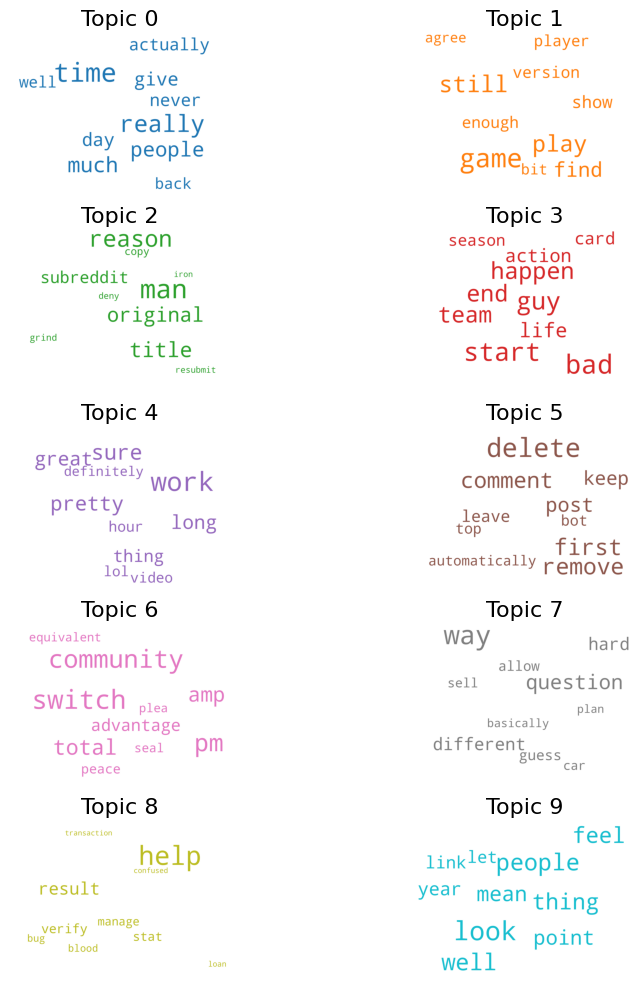

In [12]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(5, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()


14. pyLDAVis
Finally, pyLDAVis is the most commonly used and a nice way to visualise the information contained in a topic model. Below is the implementation for LdaModel().

In [13]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 KB 23.9 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.2.0 which is incompatible.


In [14]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

/usr/local/lib/python3.9/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9     -0.314958 -0.115379       1        1  27.110444
0     -0.287962 -0.145703       2        1  26.808861
5      0.057117 -0.052168       3        1  10.878728
4     -0.083923  0.070782       4        1   7.220174
1      0.008788  0.284589       5        1   6.383675
3     -0.030402  0.250295       6        1   6.229184
2      0.191488 -0.108108       7        1   5.210813
7      0.053710  0.041107       8        1   4.539335
8      0.202754 -0.113989       9        1   3.715535
6      0.203389 -0.111425      10        1   1.903252, topic_info=                 Term          Freq         Total Category  logprob  loglift
44               help  17307.000000  17307.000000  Default  30.0000  30.0000
707            delete  22091.000000  22091.000000  Default  29.0000  29.0000
1461              man  14856.000000  14856.000000  Default  28.0000  28.0000
790            remove  16359.000000  16359.000000  Default  27.0000  27.0000
764             first  16145.000000  16145.000000  Default  26.0000  26.0000
...               ...           ...           ...      ...      ...      ...
9795    advertisement     64.759426     66.006435  Topic10  -6.1839   3.9425
10140              bl     60.670428     61.917363  Topic10  -6.2492   3.9413
39634  correct_answer     57.383540     58.711048  Topic10  -6.3049   3.9387
11922     instruction    321.517984    329.035118  Topic10  -4.5816   3.9385
22408          treaty     50.964938     52.211993  Topic10  -6.4235   3.9374

[363 rows x 6 columns], token_table=       Topic      Freq       Term
term                             
3512       8  0.997739     accept
2830       6  0.999353     action
2585       2  0.999522   actually
653        1  0.999434        add
8107      10  0.998320  advantage
...      ...       ...        ...
2639       4  0.997700      worry
1847       1  0.687557       year
1847       2  0.312184       year
2580       8  0.998697      young
19363     10  0.988302        zen

[380 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 1, 6, 5, 2, 4, 3, 8, 9, 7])

Добавление новых признаков в таблицу

In [ ]:
df_dominant_topic

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,7,0.4556,"way, question, different, hard, guess, allow, ...","[rule, question, anyone_else, anyone_else, all..."
1,1,9,0.6138,"look, people, well, thing, feel, mean, point, ...","[meme, image, post, allow, subreddit, direct, ..."
2,2,7,0.4556,"way, question, different, hard, guess, allow, ...","[rule, question, anyone_else, anyone_else, all..."
3,3,7,0.4556,"way, question, different, hard, guess, allow, ...","[rule, question, anyone_else, anyone_else, all..."
4,4,1,0.8503,"game, still, play, find, show, version, enough...","[diagnose_anyone, speak, determine, adhd, unsa..."
...,...,...,...,...,...
228623,228623,9,0.5249,"look, people, well, thing, feel, mean, point, ...","[remember, clipper, year, manu, prime]"
228624,228624,0,0.7753,"time, really, much, people, give, day, never, ...","[second, thought, actually, autistic]"
228625,228625,0,0.8200,"time, really, much, people, give, day, never, ...","[darkness, old, friend, talk]"
228626,228626,0,0.7750,"time, really, much, people, give, day, never, ...","[enter, key, spoiler, tagging]"


In [ ]:
with open('drive/MyDrive/Diplom/full_data.csv') as f:
    full_data = pd.read_csv(f, sep=',')

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
full_data

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,link_id,author,score,body,ups,Y,polarity,subjectivity,body_length
0,t3_2l5szg,ADHDbot,1,"As per the rules in the side bar, yes or no qu...",1.0,0.0,0.166667,0.375,250.0
1,t3_2l61gs,ADHDbot,1,Meme and image posts are not allowed on this s...,1.0,0.0,0.100000,0.400,254.0
2,t3_2l7ma8,ADHDbot,1,"As per the rules in the side bar, yes or no qu...",1.0,0.0,0.166667,0.375,250.0
3,t3_2l7t5h,ADHDbot,1,"As per the rules in the side bar, yes or no qu...",1.0,0.0,0.166667,0.375,250.0
4,t3_2l900k,ADHDbot,1,We cannot and will not diagnose anyone. You n...,1.0,0.0,0.050000,0.550,254.0
...,...,...,...,...,...,...,...,...,...
228623,t3_5on47d,kcheng686,1,I remember the 2007 clippers.\n\nWhich is the ...,0.0,2.0,0.000000,0.125,76.0
228624,t3_5q9ppf,DisconnectedCorn,1,On second thought you might actually be autistic,0.0,2.0,-0.100000,0.100,49.0
228625,t3_5pqb17,najing_ftw,3,"Hello darkness, my old friend,\nI've come to t...",0.0,2.0,0.100000,0.200,63.0
228626,t3_5oh8zt,Fourteen_of_Twelve,5,You can't use the enter key when you're doing ...,0.0,2.0,0.000000,1.000,62.0


In [ ]:
result = pd.concat([full_data,df_dominant_topic], axis=1)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
result

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,link_id,author,score,body,ups,Y,polarity,subjectivity,body_length,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,t3_2l5szg,ADHDbot,1,"As per the rules in the side bar, yes or no qu...",1.0,0.0,0.166667,0.375,250.0,0,7,0.4556,"way, question, different, hard, guess, allow, ...","[rule, question, anyone_else, anyone_else, all..."
1,t3_2l61gs,ADHDbot,1,Meme and image posts are not allowed on this s...,1.0,0.0,0.100000,0.400,254.0,1,9,0.6138,"look, people, well, thing, feel, mean, point, ...","[meme, image, post, allow, subreddit, direct, ..."
2,t3_2l7ma8,ADHDbot,1,"As per the rules in the side bar, yes or no qu...",1.0,0.0,0.166667,0.375,250.0,2,7,0.4556,"way, question, different, hard, guess, allow, ...","[rule, question, anyone_else, anyone_else, all..."
3,t3_2l7t5h,ADHDbot,1,"As per the rules in the side bar, yes or no qu...",1.0,0.0,0.166667,0.375,250.0,3,7,0.4556,"way, question, different, hard, guess, allow, ...","[rule, question, anyone_else, anyone_else, all..."
4,t3_2l900k,ADHDbot,1,We cannot and will not diagnose anyone. You n...,1.0,0.0,0.050000,0.550,254.0,4,1,0.8503,"game, still, play, find, show, version, enough...","[diagnose_anyone, speak, determine, adhd, unsa..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228623,t3_5on47d,kcheng686,1,I remember the 2007 clippers.\n\nWhich is the ...,0.0,2.0,0.000000,0.125,76.0,228623,9,0.5249,"look, people, well, thing, feel, mean, point, ...","[remember, clipper, year, manu, prime]"
228624,t3_5q9ppf,DisconnectedCorn,1,On second thought you might actually be autistic,0.0,2.0,-0.100000,0.100,49.0,228624,0,0.7753,"time, really, much, people, give, day, never, ...","[second, thought, actually, autistic]"
228625,t3_5pqb17,najing_ftw,3,"Hello darkness, my old friend,\nI've come to t...",0.0,2.0,0.100000,0.200,63.0,228625,0,0.8200,"time, really, much, people, give, day, never, ...","[darkness, old, friend, talk]"
228626,t3_5oh8zt,Fourteen_of_Twelve,5,You can't use the enter key when you're doing ...,0.0,2.0,0.000000,1.000,62.0,228626,0,0.7750,"time, really, much, people, give, day, never, ...","[enter, key, spoiler, tagging]"


In [ ]:
result.to_csv('drive/MyDrive/Diplom/result.csv', sep=',', index=False)
print("Saved")

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Saved
